# Lexicons

In [3]:
library(tidytext)
library(tm)
library(dplyr)
library(textdata)
library("ggplot2")

Loading required package: NLP


Attaching package: ‘dplyr’


The following object is masked from ‘package:qdapTools’:

    id


The following object is masked from ‘package:qdapRegex’:

    explain


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following object is masked from ‘package:qdapRegex’:

    %+%




In [6]:
# Load functions from a file
source(here::here('functions.R'))

In [11]:
# Load the lexicon
# "afinn", "bing", "nrc", "loughran"
bing <- get_sentiments(lexicon = c("bing"))
head(bing)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


In [8]:
# Define a word
term <- "good"

# Use lexicon to get the sentiment of a word with bing
bing[bing$word == term,"sentiment"]

sentiment
<chr>
positive


# News sentiment analysis

In [12]:
# Load the news data
news <- read.csv('data/NewsSample.csv')
head(news,2)

id        
1 1828023818
2 1621442701
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [13]:
# Create custom stop words
stops <- c("and", "or", "but", "not", "is", "are", "the", "a", "an",
           "this", "that", "it", "its", "he", "she", "they", "them",
           "we", "us", "you", "your")

# Load and Organize News Data
txtDTM <- cleanMatrix("data/NewsSample.csv",
                      'text',
                      collapse        = F,  
                      customStopwords = stops,
                      type            = 'DTM', 
                      wgt             = 'weightTf')

# Turn to a matrix & examine
txtDTMmatrix <- as.matrix(txtDTM)
txtDTMmatrix[,1:10]
dim(txtDTMmatrix)

[1] "DTM"
[1] "reading in csv"
[1] "cleaning text"
[1] "complete!"


,abbvie,ability,about,above,aboveaverage,abroad,accelerated,accelerates,access,accompanied
1,0,0,1,2,0,0,0,0,0,1
2,0,0,5,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,2,1,0,0,0,0,0,0
5,0,0,4,2,0,0,0,0,1,0
6,0,1,4,0,0,0,0,0,0,0
7,0,0,0,1,0,0,1,0,0,0
8,0,0,1,1,0,0,0,1,0,0
9,2,0,1,0,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0,0


[1]   10 1924

In [14]:
# Convert to a tidy format
tidyCorp <- tidy(txtDTM)
tidyCorp
dim(tidyCorp)

document,term,count
<chr>,<chr>,<dbl>
1,about,1
1,above,2
1,accompanied,1
1,according,4
1,after,3
1,afternoon,1
1,again,1
1,against,2
1,ago,1


[1] 3162    3

In [15]:
# Perform Inner Join 
# (find common words between the tidy corpus and the bing lexicon)
bingSent <- inner_join(tidyCorp, bing, by=c('term' = 'word'))
bingSent

document,term,count,sentiment
<chr>,<chr>,<dbl>,<chr>
1,chaotic,1,negative
1,concern,1,negative
1,concerns,2,negative
1,confidence,1,positive
1,crisis,1,negative
1,crude,1,negative
1,debt,1,negative
1,decline,1,negative
1,declines,1,negative


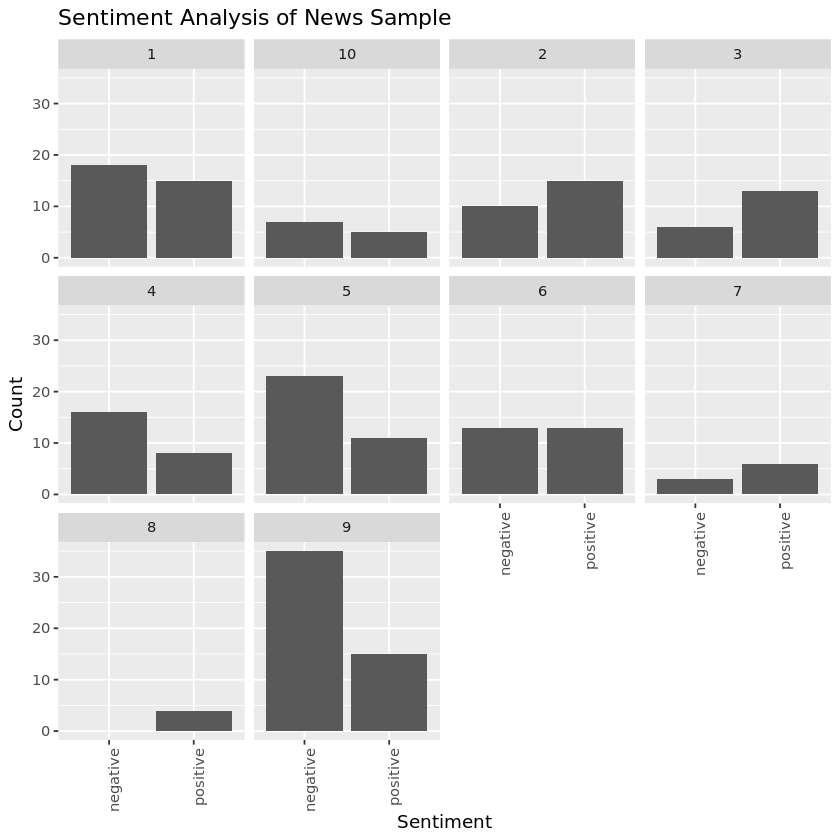

In [16]:
# Histogram of sentiment for each document
ggplot(bingSent, aes(x=sentiment)) +
  geom_bar(stat='count') +
  facet_wrap(~document) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Sentiment Analysis of News Sample",
       x = "Sentiment",
       y = "Count")

In [17]:
# Quick Analysis
aggregate(count~sentiment,bingSent, sum)

sentiment,count
<chr>,<dbl>
negative,173
positive,117


In [19]:
# Final sentiment / our custom polarity
# (positive - negative) / (positive + negative)

# Task: fill in the numbers


# Calculate sentiment per document

In [24]:
# filter bigSent by document
bingSentDoc <- bingSent %>%
  group_by(document) %>%
  summarise(pos = sum(count[sentiment == "positive"]),
            neg = sum(count[sentiment == "negative"]),
            net = (pos - neg) / (pos + neg))

# convert bingSentDoc$document to a numeric value
bingSentDoc$document <- as.numeric(bingSentDoc$document)
# sort bingSentDoc by document
bingSentDoc <- bingSentDoc[order(bingSentDoc$document),]
  
  
# Add sentiment values to news dataset 
news$bingpos <- bingSentDoc$pos
news$bingneg <- bingSentDoc$neg
news$bingsent <- (news$bingpos - news$bingneg) / (news$bingpos + news$bingneg)


# Check the results
head(news[,-c(2)])

,id,bingpos,bingneg,bingsent
,<dbl>,<dbl>,<dbl>,<dbl>
1,1828023818,18,22,-0.10000000
2,1621442701,17,15,0.06250000
3,1885363465,13,6,0.36842105
4,1814005313,9,23,-0.43750000
5,1650376826,11,33,-0.50000000
6,889154322,15,16,-0.03225806


# Loughran-McDonald Sentiment Lexicon

In [47]:
# Get afinn lexicon
# afinn<-get_sentiments(lexicon = c("afinn"))

# Load afinn lexicon from file
afinn <- read.csv("data/afinn.csv")
head(afinn)

Warning message in file(file, "rt"):
“cannot open file 'data/afinn.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# Perform Inner Join
afinnSent <- inner_join(tidyCorp,afinn, by=c('term' = 'word'))
afinnSent

In [ ]:
# Histogram of sentiment for each document
ggplot(afinnSent, aes(x=value)) +
  geom_bar(stat='count') +
  facet_wrap(~document) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Sentiment Analysis of News Sample",
       x = "Sentiment",
       y = "Count")

In [ ]:
# Quick Analysis
aggregate(count~value,afinnSent, sum)

In [ ]:
# VADER lexicon

In [28]:
library(vader)

ERROR: Error in library(vader): there is no package called ‘vader’


In [ ]:
# Apply vader lexicon
vader_sent = vader_df(news$text, incl_nt = T, neu_set = T, rm_qm = F)

In [ ]:
# Look at the results
head(vader_sent,2)

In [ ]:
# Add vader sentiment to news dataset
news$vaderpos <- vader_sent$pos
news$vaderneg <- vader_sent$neg
news$vadercompound <- vader_sent$compound
news$vadersent <- (news$vaderpos - news$vaderneg) / (news$vaderpos + news$vaderneg)

In [ ]:
# Plot histogram of vader sentiment
ggplot(news, aes(x=vadersent)) +
  geom_histogram(binwidth = 0.1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Histogram of VADER Sentiment",
       x = "Sentiment",
       y = "Count")

In [ ]:
# Histogram of vader compound sentiment
ggplot(news, aes(x=vadercompound)) +
  geom_histogram(binwidth = 0.1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Histogram of VADER compound Sentiment",
       x = "Sentiment",
       y = "Count")

In [ ]:
# Add histogram of bing sentiment
ggplot(news, aes(x=bingsent)) +
  geom_histogram(binwidth = 0.1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Histogram of Bing Sentiment",
       x = "Sentiment",
       y = "Count")

# Emotions  
# NRC Word-Emotion Association Lexicon (aka EmoLex)

In [32]:
library(lexicon)
library(tidyr)

In [33]:
# Get the nrc lexicon (only 8 emotions)
nrc <- nrc_emotions

# Pivot the data for joining 
nrcLex <- pivot_longer(nrc, c(-term))
nrcLex <- subset(nrcLex, nrcLex$value>0)
nrcLex$value <- NULL

In [34]:
# Check the nrc lexicon
head(nrcLex)

term,name
<chr>,<chr>
abacus,trust
abandon,fear
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,sadness


In [35]:
# inner join with the nrc lexicon (find common terms from data and lexicon)
nrcSent <- inner_join(tidyCorp,nrcLex, by=c('term' = 'term'))

Warning message in inner_join(tidyCorp, nrcLex, by = c(term = "term")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 71 of `x` matches multiple rows in `y`.
ℹ Row 614 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [36]:
# Quick Analysis
table(nrcSent$name)
emos <- data.frame(table(nrcSent$name))


       anger anticipation      disgust         fear          joy      sadness 
          42          112           14           71           57           62 
    surprise        trust 
          58          142 

In [41]:
library(radarchart)
#chartJSRadar(scores = emos, labelSize = 10, showLegend = F)

# Twitter sentiment analysis

# Homework: Try to load dataset TweetsSample.csv from folder data 
# and try to do the same analysis as above